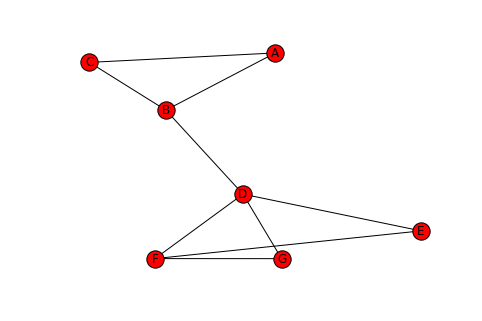

In [3]:
from collections import Counter, defaultdict, deque
import copy
import math
import networkx as nx
import urllib.request
%matplotlib inline
def example_graph():
    """
    Create the example graph from class. Used for testing.
    Do not modify.
    """
    g = nx.Graph()
    g.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('D', 'E'), ('D', 'F'), ('D', 'G'), ('E', 'F'), ('G', 'F')])
    return g

graph = example_graph()
nx.draw(graph, with_labels=True)

In [302]:
def bfs(graph, root, max_depth):
    visited = set()
    main_node = root
    depth = 0
    node2distances = defaultdict(int)
    node2parents = defaultdict(list)
    node2num_paths = defaultdict(int)
    nodedist = defaultdict(int)
    total = deque(root)
    while total:
        vertex = total.pop()
        root = graph.neighbors(vertex)
        path = nx.dijkstra_path(graph,main_node,vertex,'distance')
        node2distances[vertex] = len(path)-1
        shortest_path = nx.all_shortest_paths(graph,source=main_node,target=vertex)
        node2num_paths[vertex] = len(list(shortest_path))
        if node2distances[vertex] < max_depth:
            if vertex not in visited:
                visited.add(vertex)
                for r in root:
                    nodedist = len(nx.dijkstra_path(graph,main_node,r,'distance'))-1
                    if r not in visited:
                        total.append(r)
                    if nodedist == node2distances[vertex]+1:
                        node2parents[r].append(vertex)
                        

    return node2distances,node2num_paths,node2parents
                        
node2distances, node2num_paths, node2parents = bfs(example_graph(), 'E', 5)
sorted((node, sorted(parents)) for node, parents in node2parents.items())

[('A', ['B']),
 ('B', ['D']),
 ('C', ['B']),
 ('D', ['E']),
 ('F', ['E']),
 ('G', ['D', 'F'])]

In [36]:
nx.dijkstra_path(graph,'E','E','distance')

['E']

In [43]:
nx.single_source_shortest_path(graph, 'E', cutoff=None)

{'A': ['E', 'D', 'B', 'A'],
 'B': ['E', 'D', 'B'],
 'C': ['E', 'D', 'B', 'C'],
 'D': ['E', 'D'],
 'E': ['E'],
 'F': ['E', 'F'],
 'G': ['E', 'D', 'G']}

In [2]:
p = nx.all_shortest_paths(graph,source='E',target='D')
print(len(list(p)))

1


In [105]:
def bfs2(graph, root, max_depth):
    dq = deque()
    node2distances = defaultdict(int)
    node2num_paths = defaultdict(int)
    node2parents = defaultdict(list)
    visited = []
    visited.append(root)
    dq.append(root)
    node2num_paths[root]=1
    while dq:
        parent = dq.popleft()
        children = graph.neighbors(parent)
        for child in children:
            if node2distances[parent] < max_depth:
                if child not in visited:
                    visited.append(child)
                    dq.append(child)
                    node2distances[child] = node2distances[parent] + 1
                if node2distances[child] == node2distances[parent] + 1:
                    node2parents[child].append(parent)
                    node2num_paths[child] = len(node2parents[child])
    return node2distances, node2num_paths, node2parents
graph = example_graph()            
node2distances, node2num_paths, node2parents = bfs2(graph, 'E', 2)

In [208]:
def bottom_up(root, node2distances, node2num_paths, node2parents):
    nodes = defaultdict(float)
    result = {}
    for key in node2parents:
        nodes[key] = 1/node2num_paths[key]

    for key,val in sorted(node2distances.items(),key=lambda x: -x[1]):
        for newkey in node2parents[key]:
            nodes[newkey] = nodes[newkey] + nodes[key]
            result[tuple(sorted([key,newkey]))] = nodes[key]
            
    return result


graph = example_graph()            
node2distances, node2num_paths, node2parents = bfs(graph, 'E', 5)
bottom_up('E', node2distances, node2num_paths, node2parents)


{('A', 'B'): 1.0,
 ('B', 'C'): 1.0,
 ('B', 'D'): 3.0,
 ('D', 'E'): 4.5,
 ('D', 'G'): 0.5,
 ('E', 'F'): 1.5,
 ('F', 'G'): 0.5}

In [209]:
def bup(root, node2distances, node2num_paths, node2parents):    
    node2dist = sorted(node2distances.items(), key=lambda x: -x[1])
    edgeOfNode = defaultdict(float)


    for i in node2parents:
        edgeOfNode[i] = 1/node2num_paths[i]

    for i,j in node2dist:
        for k in node2parents[i]:
            edgeOfNode[k]=edgeOfNode[k]+edgeOfNode[i]
    edgeOfNode.pop(root)

    edgeDict = {}
    for i,j in node2dist:
        for k in node2parents[i]:
            edgeDict[tuple(sorted([i,k]))] = edgeOfNode[i]

    return edgeDict

graph = example_graph()            
node2distances, node2num_paths, node2parents = bfs(graph, 'E', 5)
bup('E', node2distances, node2num_paths, node2parents)

{('A', 'B'): 1.0,
 ('B', 'C'): 1.0,
 ('B', 'D'): 3.0,
 ('D', 'E'): 4.5,
 ('D', 'G'): 0.5,
 ('E', 'F'): 1.5,
 ('F', 'G'): 0.5}

In [154]:
graph = example_graph()
nx.edge_betweenness_centrality(graph)

{('B', 'A'): 0.23809523809523808,
 ('B', 'C'): 0.23809523809523808,
 ('B', 'D'): 0.5714285714285714,
 ('C', 'A'): 0.047619047619047616,
 ('E', 'D'): 0.21428571428571427,
 ('F', 'D'): 0.19047619047619047,
 ('F', 'E'): 0.07142857142857142,
 ('F', 'G'): 0.07142857142857142,
 ('G', 'D'): 0.21428571428571427}

In [201]:
graph = example_graph()
nx.edge_betweenness_centrality_subset(graph,graph.nodes(),graph.nodes())

{('B', 'A'): 5.0,
 ('B', 'C'): 5.0,
 ('B', 'D'): 12.0,
 ('C', 'A'): 1.0,
 ('E', 'D'): 4.5,
 ('F', 'D'): 4.0,
 ('F', 'E'): 1.5,
 ('F', 'G'): 1.5,
 ('G', 'D'): 4.5}

In [212]:
graph = example_graph()
q = deque(graph.nodes())
while len(q)!= 0:
    root = q.pop()
    print(root)
    

A
D
E
G
C
F
B


In [220]:
def approximate_betweenness(graph, max_depth):   
    approx_betweenness = defaultdict(list)
    all_nodes = deque(graph.nodes())
    while len(all_nodes)!=0:
        root = all_nodes.pop()
        node2distances, node2num_paths, node2parents = bfs(graph, root, max_depth )
        bup = bottom_up(root, node2distances, node2num_paths, node2parents)
        for key in bup:
            if key in approx_betweenness:
                approx_betweenness[key] = approx_betweenness[key]+bup[key]
            if key not in approx_betweenness:
                approx_betweenness[key]= bup[key]
                
    for key in approx_betweenness:
        approx_betweenness[key] = approx_betweenness[key]/2

    return approx_betweenness

approximate_betweenness(example_graph(),2)

defaultdict(list,
            {('A', 'B'): 4.0,
             ('A', 'C'): 2.0,
             ('B', 'C'): 4.0,
             ('B', 'D'): 12.0,
             ('D', 'E'): 5.0,
             ('D', 'F'): 4.0,
             ('D', 'G'): 5.0,
             ('E', 'F'): 3.0,
             ('F', 'G'): 3.0})

In [221]:
def approx_btw(graph, max_depth):  
    ApproxDict = defaultdict()
    for root in graph.nodes():
        node2distances, node2num_paths, node2parents = bfs2(example_graph(), root, max_depth )
        bottomDict = bup(root, node2distances, node2num_paths, node2parents)
        print(ApproxDict)
        for edge in bottomDict:
            if edge in ApproxDict:
                ApproxDict[edge] = ApproxDict[edge]+bottomDict[edge]
            else:
                ApproxDict[edge]= bottomDict[edge]

    for i in ApproxDict:
        ApproxDict[i] = ApproxDict[i]/2

    return ApproxDict
approx_btw(example_graph(),2)

defaultdict(None, {})
defaultdict(None, {('D', 'G'): 1.0, ('A', 'B'): 1.0, ('D', 'E'): 1.0, ('D', 'F'): 1.0, ('B', 'C'): 1.0, ('B', 'D'): 4.0})
defaultdict(None, {('E', 'F'): 1.0, ('D', 'G'): 1.0, ('F', 'G'): 1.0, ('A', 'B'): 1.0, ('D', 'E'): 1.0, ('D', 'F'): 3.0, ('B', 'C'): 1.0, ('B', 'D'): 5.0})
defaultdict(None, {('E', 'F'): 1.0, ('D', 'G'): 1.0, ('F', 'G'): 1.0, ('A', 'B'): 1.0, ('A', 'C'): 1.0, ('D', 'E'): 1.0, ('D', 'F'): 3.0, ('B', 'C'): 3.0, ('B', 'D'): 6.0})
defaultdict(None, {('E', 'F'): 1.5, ('D', 'G'): 3.5, ('F', 'G'): 2.5, ('A', 'B'): 1.0, ('A', 'C'): 1.0, ('D', 'E'): 1.5, ('D', 'F'): 3.0, ('B', 'C'): 3.0, ('B', 'D'): 7.0})
defaultdict(None, {('E', 'F'): 3.0, ('D', 'G'): 4.0, ('F', 'G'): 3.0, ('A', 'B'): 1.0, ('A', 'C'): 1.0, ('D', 'E'): 4.0, ('D', 'F'): 3.0, ('B', 'C'): 3.0, ('B', 'D'): 8.0})
defaultdict(None, {('E', 'F'): 3.0, ('D', 'G'): 5.0, ('F', 'G'): 3.0, ('A', 'B'): 2.0, ('A', 'C'): 1.0, ('D', 'E'): 5.0, ('D', 'F'): 4.0, ('B', 'C'): 4.0, ('B', 'D'): 11.0})


defaultdict(None,
            {('A', 'B'): 2.0,
             ('A', 'C'): 1.0,
             ('B', 'C'): 2.0,
             ('B', 'D'): 6.0,
             ('D', 'E'): 2.5,
             ('D', 'F'): 2.0,
             ('D', 'G'): 2.5,
             ('E', 'F'): 1.5,
             ('F', 'G'): 1.5})

In [226]:
def gnwm(graph, max_depth):
    components = [c for c in nx.connected_component_subgraphs(graph)]
    while len(components) == 1:
        edge_to_remove = sorted(approximate_betweenness(graph, max_depth).items(), key=lambda x:x[1], reverse = True)[0][0]
        graph.remove_edge(*edge_to_remove)
        components = [c for c in nx.connected_component_subgraphs(graph)]

    #result = [c.nodes() for c in components]
    return components

components = gnwm(example_graph(), 5)
components = sorted(components, key=lambda x: sorted(x.nodes())[0])
sorted(components[0].nodes())

['A', 'B', 'C']

In [342]:
def partition_girvan_newman(graph, max_depth):
    components = [n for n in nx.connected_component_subgraphs(graph)]

    for component in components:
        unwanted_edges = sorted(approximate_betweenness(graph, max_depth).items(), key=lambda x:x[1], reverse = True)
        unwanted_edges = unwanted_edges[0][0]
        graph.remove_edge(*unwanted_edges)
        components = [n for n in nx.connected_component_subgraphs(graph)]
        print(len(components))

    return components

components = partition_girvan_newman(example_graph(), 5)
components = sorted(components, key=lambda x: sorted(x.nodes())[0])
sorted(components[1].nodes())

2


['D', 'E', 'F', 'G']

In [261]:
def get_sub(graph, min_degree):
    subgraph = graph.copy()
    for node in subgraph.degree().items():
        if node[1] < min_degree:
            subgraph.remove_node(node[0])
    return subgraph

subgraph = get_sub(example_graph(), 4)
sorted(subgraph.nodes())

['D']

In [303]:
def get_subgraph(graph, min_degree):
    subgraph = graph.subgraph(graph.nodes())
    degree = subgraph.degree()
    to_keep = [n for n in degree if degree[n] >= min_degree]
    final_sub = graph.subgraph(to_keep)
    return final_sub

subgraph = get_subgraph(example_graph(), 4)
sorted(subgraph.nodes())

['D']

In [289]:
def volume(nodes,graph):
    vol = 0;
    edge = [e for e in graph.edges_iter()]
    for x in range(0,2):
        print(edge[x])
#        if edge[x] in nodes:
#            vol = vol + 1
#        elif e[1] in nodes:
#            vol = vol + 1
    return vol


volume(['A', 'B', 'C'], example_graph())

('B', 'D')
('B', 'C')


0

In [291]:
def cut(S,T,graph):
    cut = 0
    edge = [e for e in graph.edges_iter()]
    for e in edge:
        if e[0] in S and e[1] in T:
            cut = cut + 1
        if e[1] in S and e[0] in T:
            cut = cut + 1
    return cut

cut(['A', 'B'], ['C'], example_graph())

2

In [292]:
def norm_cut(S, T, graph):
    norm_cut = (cut(S, T, graph)/volume(S,graph)) + (cut(S,T,graph)/volume(T,graph))
    return norm_cut

In [304]:
def score_max_depths(graph, max_depths):
    new_graph = graph
    score = list(int,float)
    for depth in max_depths:
        partitions = partition_girvan_newman(new_graph, depth)
        list1 = partitions[0]
        list2 = partitions[1]
#        oldGraph = graph.copy()
        score.append((depth,norm_cut(list1, list2, oldGraph)))
    return score

In [5]:
def make_training_graph(graph, test_node, n):
    oldgraph = graph
    neighbors = sorted(oldgraph.neighbors(test_node))
    for x in range(0,n):
        oldgraph.remove_edge(neighbors[x],test_node)
    return oldgraph

g = example_graph()
sorted(g.neighbors('D'))
train_graph = make_training_graph(g, 'D', 2)
sorted(train_graph.neighbors('D'))

['F', 'G']

In [1]:
a = [2]
print(len(a))

1


In [74]:
def rank_by_jaccard(graph, node, k):
    jaccard = nx.jaccard_coefficient(graph)
    scores = []
    for j in jaccard:
        if j[0] == node:
            scores.append(j)
    final = sorted(scores, key=lambda x: x[2], reverse=False)
    return final[-2:]

g = example_graph()
train_graph = make_training_graph(g, 'D', 2)
rank_by_jaccard(train_graph, 'D', 2)

[('D', 'A', 0.0), ('D', 'E', 0.5)]

In [75]:
graph = example_graph()
res = nx.jaccard_coefficient(graph)
for x,y,z in res:
    print (x)
    print(y)
    print(z)

A
E
0.0
B
E
0.25
B
F
0.2
B
G
0.25
C
E
0.0
D
A
0.2
D
C
0.2
F
A
0.0
F
C
0.0
G
A
0.0
G
C
0.0
G
E
1.0


In [103]:
def eval(predicted_edges, graph):
    edge = sorted(graph.edges_iter(), key=lambda x: x[1], reverse=False)
    count = 0
    for e in edge:
        for p in predicted_edges:
            if sorted(p) == sorted(e):
                count = count + 1
                    
    return count/len(predicted_edges)

eval([('D', 'E'), ('D', 'A')], example_graph())
    

0.5